# __Create wells and tunnels__

### Problem statement

In DFN.Lab, wells and tunnels can be integrated into the system for several purposes, such as:
- Analyzing intersections between the DFN and specific geometries (e.g., wells, tunnels).
- Applying hydraulic boundary conditions for flow simulations.

Wells and tunnels can either be generated directly within DFN.Lab (for simple geometries) or imported from external geometry files in STL format (for more complex geometries).

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/well_tunnel.png" width="400"/>
</div>
<br>
Example of wells and tunnels. Wells are simple 1D objects representing boreholes, while tunnels are represented by their surface geometry.
</center>

### Learning Objectives:
By the end of this tutorial, you will be able to:
- Create a simple well in DFN.Lab.
- Create a cylindrical tunnel and add it to a DFN system.
- Import tunnel geometries from an external STL file for more complex simulations.

### DFN.Lab Model Overview

In this tutorial, we will work with two primary modules from DFN.Lab:

- **System Module**: This module manages the DFN system. It allows us to combine fractures, domains, wells, and tunnels into a single system for analysis and simulations.
- **Domains Module**: This module is responsible for generating and managing domain geometries, such as the boundaries of the model space.

These modules form the foundation for integrating wells and tunnels, which will be key for performing intersection analyses or imposing hydraulic boundary conditions.

### DFN.Lab Model

In DFN.Lab, wells and tunnels are referred to as "geometries." These geometries must be incorporated into the system in order to analyze their intersections with the DFN or to perform simulations of physical processes such as fluid flow or transport.

- **Wells** are modeled as 1D line objects, typically representing boreholes or observation wells.
- **Tunnels** are volumetric objects defined by their surface geometry. In this tutorial, we will generate a simple cylindrical tunnel, but more complex geometries can be imported via STL files.

In [1]:
# Import necessary modules
# System: This module handles the system construction with fractures, domains, and geometries.
# Domains: This module provides tools to create and manage domain geometries.
import dfnlab.System as sys
import dfnlab.Domains as dom

--------------------------------

### Create system
We first need to create an empty system.

In [2]:
# Initialize an empty DFN system.
system = sys.System()

### Create domain
Then we create a global domain (the model volume) and assign it to the system. Here the global domain is a cube of 1000 m side.

In [3]:
# Create a cubic global domain with side lengths of 1000 m and assign it to the system.
domain = dom.Domain()
domain.buildParallelepiped([0, 0, 0], 1000.)
system.setDomain(domain)

### Create wells

Here we a linear well and a polyline well crossing the domain.

In [4]:
# Define the start and end positions for the first well (linear 1D object).
positionWell1Begin = [-250,0.,500]
positionWell1End = [-250,0.,-500]
# Create a Well1D object using the specified positions.
well1= dom.Well1D(point1=positionWell1Begin, point2=positionWell1End)    
# Add the well geometry to the system for further analysis.
system.addGeometry(well1)

# Define the series of positions for non linear boreholes.
wellPositions = [[250,0.,500], [250,1.,200], [250,3.,0], [250,5,-100], [250,8,-200], [250,10,-300], [250,13,-400], [250,18,-500]]
well2= dom.Well1D(wellPositions)
system.addGeometry(well2)

We visualise the wells.

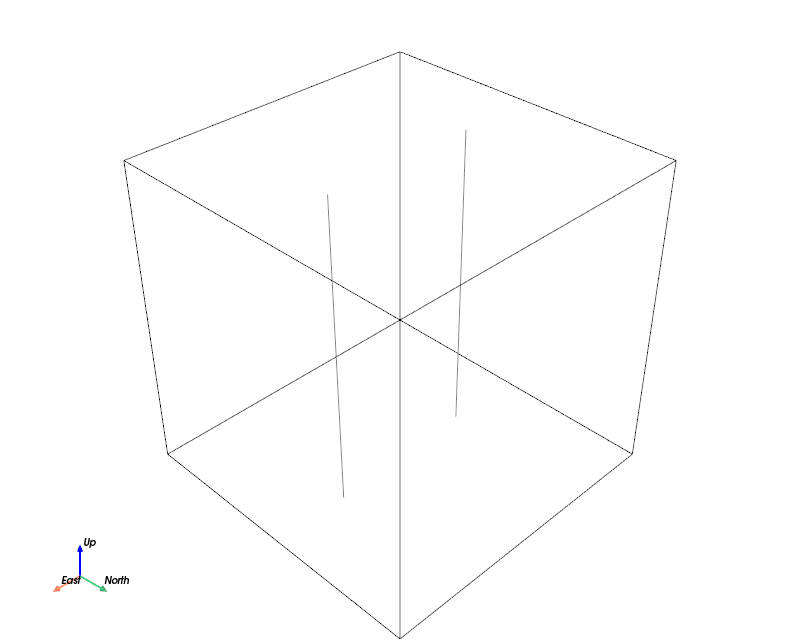

In [5]:
# Visualize the domain and the geometries (wells or tunnels) added to the system.
# This provides a 3D view to ensure the geometries are correctly defined.
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)

### Create a cylindrical tunnel
Straight, cylindrical tunnels can be created by defining a diameter, and the starting / ending points of the centerline.

In [6]:
# Create a cylindrical tunnel with a 20-meter diameter, starting from position (-500, 0) to (500, 0).
# Set the tunnel as open (not closed at the ends) and assign it an index for referencing.
positionTunnel1Begin = [0.,-500,0]
positionTunnel1End = [0.,500,0]
tunnel1 = dom.Tunnel(position1=positionTunnel1Begin, position2=positionTunnel1End, closed=False, diameter=20, index=1)
system.addGeometry(tunnel1)

Visualisation.

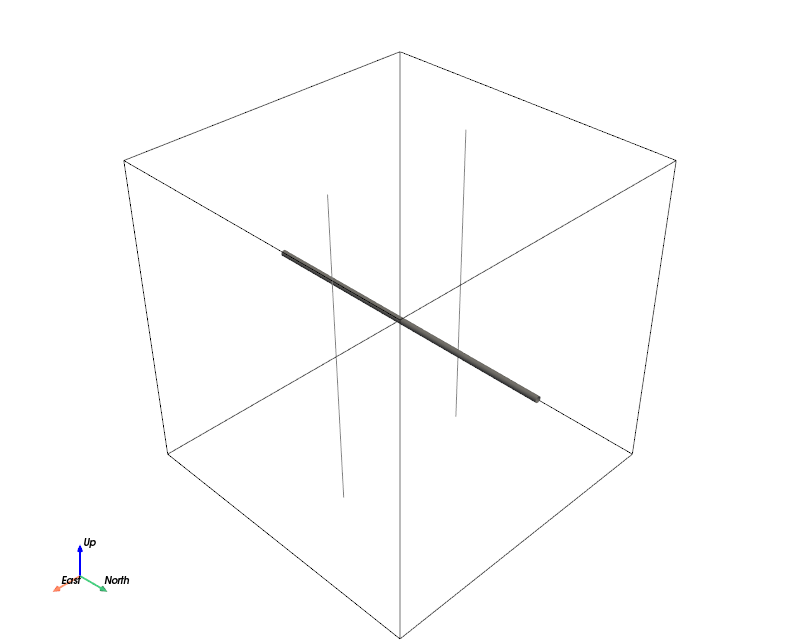

In [7]:
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)

### Create Tunnels from STL Geometry Files

For more complex geometries that cannot be easily created within DFN.Lab, you can import external files in STL format. This allows for more flexibility in modeling custom tunnel shapes.

STL (Stereolithography) is a common file format used for representing the surface geometry of a 3D object. DFN.Lab supports importing these files for tunnel geometries.


In [8]:
import dfnlab.Geometry as geom

stlReader = geom.STLReader("./sources/tunnel_example.stl") 
tunnel2 = dom.Tunnel(stlReader.getSurface())
system.addGeometry(tunnel2)

Visualisation.

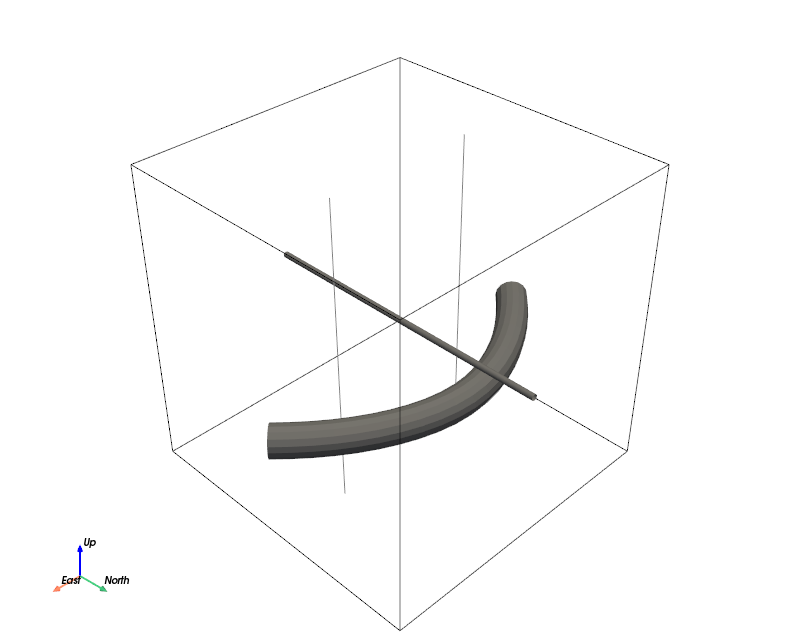

In [9]:
from sources.functions import plot_domain_and_geometries
plot_domain_and_geometries(system)

### Summary

In this tutorial, you've learned how to:
- Define wells and tunnels as geometries in DFN.Lab.
- Integrate them into the system for intersection analysis and boundary condition application.
- Import complex tunnel geometries from STL files.